In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_xml('standard_apr22frl_xml.xml')

In [3]:
df.head()

,fideid,name,country,sex,title,w_title,o_title,foa_title,rating,games,k,birthday,flag
0,25121731,A C J John,IND,M,None,None,None,None,1063,0,40,1987.0,i
1,35077023,A Chakravarthy,IND,M,None,None,None,None,1151,0,40,1986.0,i
2,10207538,"A E M, Doshtagir",BAN,M,None,None,None,None,1840,0,40,1974.0,i
3,10680810,"A hamed Ashraf, Abdallah",EGY,M,None,None,None,None,1728,0,40,2001.0,i
4,5716365,"A Hamid, Harman",MAS,M,None,None,None,None,1325,0,40,1970.0,i


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383008 entries, 0 to 383007
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   fideid     383008 non-null  int64  
 1   name       383008 non-null  object 
 2   country    383008 non-null  object 
 3   sex        383008 non-null  object 
 4   title      19825 non-null   object 
 5   w_title    3944 non-null    object 
 6   o_title    1134 non-null    object 
 7   foa_title  2171 non-null    object 
 8   rating     383008 non-null  int64  
 9   games      383008 non-null  int64  
 10  k          383008 non-null  int64  
 11  birthday   374508 non-null  float64
 12  flag       266245 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 38.0+ MB


In [5]:
df.describe()

,fideid,rating,games,k,birthday
count,3.830080e+05,383008.000000,383008.000000,383008.000000,374508.000000
mean,1.975240e+07,1643.558701,0.530093,30.864616,1983.441772
std,5.501232e+07,348.615116,1.924423,10.213296,20.137048
min,1.000130e+05,1001.000000,0.000000,10.000000,1919.000000
25%,2.240339e+06,1361.000000,0.000000,20.000000,1968.000000
50%,1.022449e+07,1645.000000,0.000000,40.000000,1988.000000
75%,2.463369e+07,1912.000000,0.000000,40.000000,2001.000000
max,6.520732e+08,2864.000000,45.000000,40.000000,2017.000000


In [11]:
len(df[df['title']=='GM'])
# df['title'].unique()

1756

In [13]:
df[df['title']=='GM'].describe()

,fideid,rating,games,k,birthday
count,1.756000e+03,1756.000000,1756.000000,1756.0,1756.000000
mean,6.126736e+06,2501.070046,2.586560,10.0,1977.724943
std,6.129494e+06,96.114599,5.305904,0.0,14.928283
min,1.000130e+05,2111.000000,0.000000,10.0,1922.000000
25%,1.506428e+06,2443.000000,0.000000,10.0,1967.000000
50%,4.119072e+06,2500.000000,0.000000,10.0,1979.000000
75%,1.240008e+07,2561.000000,3.000000,10.0,1989.000000
max,4.661855e+07,2864.000000,40.000000,10.0,2009.000000


In [15]:
gms = df[df['title']=='GM']

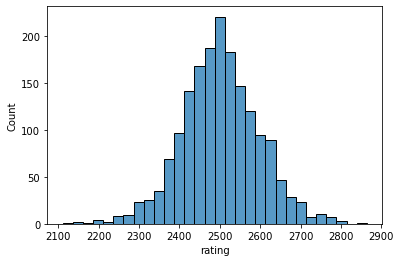

In [19]:
sns.histplot(gms['rating'], bins=30)

In [29]:
gms['age'] = gms['birthday'].apply(lambda b: 2022-b)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


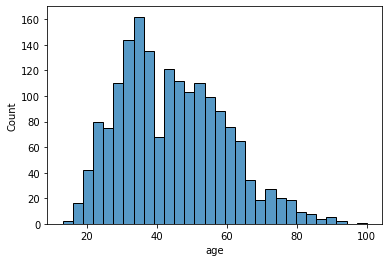

In [33]:
sns.histplot(gms['age'], bins=30)

In [34]:
df['age'] = df['birthday'].apply(lambda b: 2022-b)

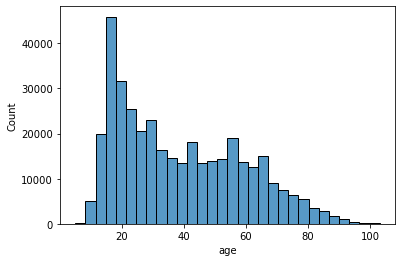

In [36]:
sns.histplot(df['age'], bins=30)

In [40]:
sum(df['title'].notnull())

19825

In [41]:
titled = df[df['title'].notnull()]

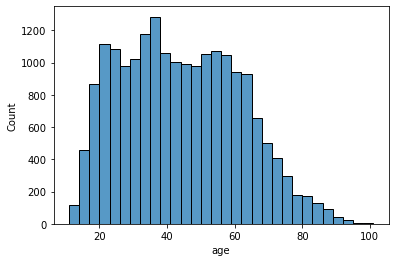

In [42]:
sns.histplot(titled['age'], bins=30)

In [43]:
titled.head()

,fideid,name,country,sex,title,w_title,o_title,foa_title,rating,games,k,birthday,flag,age
13,4804929,"A-ALI, Sali Abbas Abdulzahra",IRQ,F,WFM,WFM,None,None,1864,7,20,2001.0,w,21.0
29,1701991,"Aaberg, Anton",SWE,M,IM,None,None,None,2325,1,10,1972.0,None,50.0
33,1407589,"Aabling-Thomsen, Jakob",DEN,M,IM,None,None,None,2349,0,10,1985.0,None,37.0
75,25678191,Aaditya Dhingra,IND,M,CM,None,None,None,2042,28,40,2006.0,None,16.0
99,1401815,"Aagaard, Jacob",SCO,M,GM,None,None,None,2465,0,10,1973.0,None,49.0


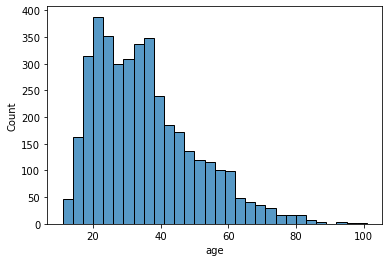

In [46]:
sns.histplot(titled[titled['sex']=='F']['age'], bins=30)

In [52]:
genders_by_age = df.pivot_table(index='age', columns='sex',aggfunc='count',fill_value=0)['rating']

In [66]:
genders_by_age['ratio'] = genders_by_age.apply(lambda x: x.F/(x.F+x.M), axis=1)

In [67]:
genders_by_age

sex,F,M,ratio
age,,,
5.0,1,0,1.000000
6.0,0,3,0.000000
7.0,8,34,0.190476
8.0,28,164,0.145833
9.0,107,489,0.179530
...,...,...,...
99.0,0,33,0.000000
100.0,3,23,0.115385
101.0,2,41,0.046512


Text(0, 0.5, 'Ratio')

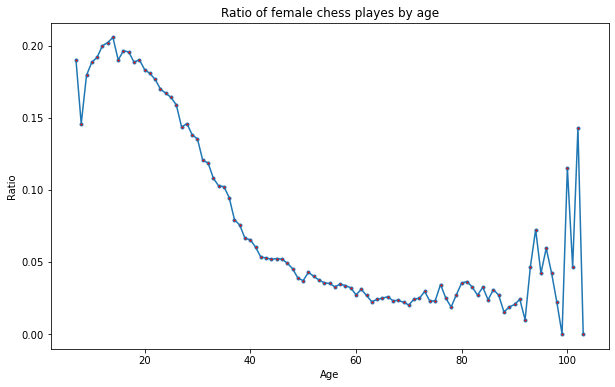

In [82]:
plt.figure(figsize=(10,6))
genders_by_age['ratio'].drop([5,6]).plot(marker='o',
         markerfacecolor='red', markersize=3)
plt.title('Ratio of female chess playes by age')
plt.xlabel('Age')
plt.ylabel('Ratio')

In [104]:
# genders_by_age.groupby(pd.cut(genders_by_age.index, np.arange(5,105,5))).sum()
# # pd.cut(genders_by_age.index, np.arange(5,105,5))[1:-3]

In [105]:
genders_by_dob = df.pivot_table(index='birthday', columns='sex',aggfunc='count',fill_value=0)['rating']
genders_by_dob['ratio'] = genders_by_dob.apply(lambda x: x.F/(x.F+x.M), axis=1)

In [113]:
genders_by_dob.tail()

sex,F,M,ratio
birthday,,,
2013.0,107,489,0.179530
2014.0,28,164,0.145833
2015.0,8,34,0.190476
2016.0,0,3,0.000000
2017.0,1,0,1.000000


Text(0, 0.5, 'Ratio')

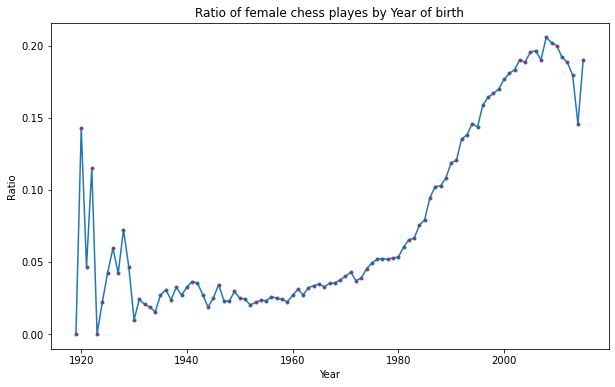

In [111]:
plt.figure(figsize=(10,6))
genders_by_dob['ratio'].drop([2016,2017]).plot(marker='o',
         markerfacecolor='red', markersize=3)
plt.title('Ratio of female chess playes by Year of birth')
plt.xlabel('Year')
plt.ylabel('Ratio')

In [137]:
rolling = genders_by_dob.rolling(window=5, min_periods=5, ).sum()
rolling['ratio'] = rolling.apply(lambda x: x.F/(x.F+x.M), axis=1)

Text(0, 0.5, 'Ratio')

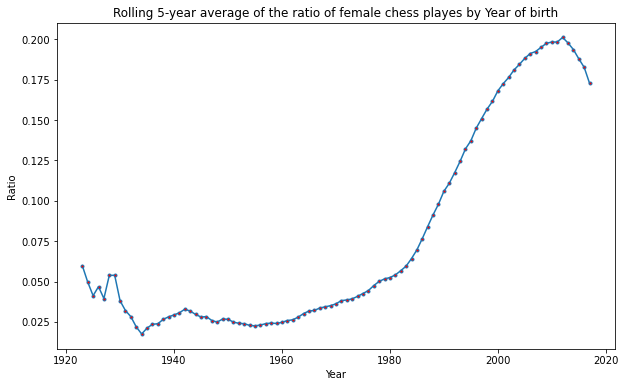

In [140]:
plt.figure(figsize=(10,6))
rolling['ratio'].plot(marker='o',
         markerfacecolor='red', markersize=3)
plt.title('Rolling 5-year average of the ratio of female chess playes by Year of birth')
plt.xlabel('Year')
plt.ylabel('Ratio')

In [139]:
rolling

sex,F,M,ratio
birthday,,,
1919.0,NaN,NaN,NaN
1920.0,NaN,NaN,NaN
1921.0,NaN,NaN,NaN
1922.0,NaN,NaN,NaN
1923.0,7.0,110.0,0.059829
...,...,...,...
2013.0,3196.0,12972.0,0.197674
2014.0,1895.0,7895.0,0.193565
2015.0,980.0,4237.0,0.187847
